In [1]:
# import nessessary package
import pandas as pd
import numpy as np
from sklearn.model_selection import BaseCrossValidator

In [27]:
#load the datset
df = pd.read_csv(r"C:\Users\admin\iqgateway\train.csv")
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#check NaN values
df.isnull().sum()

id           1080
date         1080
city         1080
lat          1131
long         1126
pop          1080
shop         1080
brand        1080
container    1096
capacity     1095
price        1080
quantity     1080
dtype: int64

In [29]:
# drop NaN values B'coz No. of NaN values are large
df = df.dropna()
df.isnull().sum()

id           0
date         0
city         0
lat          0
long         0
pop          0
shop         0
brand        0
container    0
capacity     0
price        0
quantity     0
dtype: int64

In [30]:
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6475,6475.0,31/12/17,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0
6476,6476.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0
6477,6477.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0
6478,6478.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0


In [31]:
df.describe()

,id,lat,long,pop,price,quantity
count,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000
mean,3237.037955,38.301132,23.270238,354987.271330,1.190204,29416.483061
std,1870.314859,1.650131,1.086459,232713.309214,0.816109,17891.264214
min,0.000000,35.327870,21.734440,134219.000000,0.110000,2953.000000
25%,1616.750000,37.962450,22.417610,141732.000000,0.610000,16439.750000
50%,3232.500000,38.244440,22.930860,257501.500000,0.920000,25180.000000
75%,4854.250000,39.636890,23.716220,665871.000000,1.500000,37804.000000
max,6479.000000,40.643610,25.143410,672130.000000,4.540000,145287.000000


In [32]:
df.nunique()

id           6376
date           72
city            5
lat             6
long            6
pop            30
shop            6
brand           5
container       3
capacity        3
price         394
quantity     5980
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6376 entries, 0 to 6479
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6376 non-null   float64
 1   date       6376 non-null   object 
 2   city       6376 non-null   object 
 3   lat        6376 non-null   float64
 4   long       6376 non-null   float64
 5   pop        6376 non-null   float64
 6   shop       6376 non-null   object 
 7   brand      6376 non-null   object 
 8   container  6376 non-null   object 
 9   capacity   6376 non-null   object 
 10  price      6376 non-null   float64
 11  quantity   6376 non-null   float64
dtypes: float64(6), object(6)
memory usage: 647.6+ KB


In [34]:
# Extract numerical part from capacity and convert to a common scale
df['capacity_numeric'] = df['capacity'].str.extract('(\d+\.\d+|\d+)').astype(float)

# Convert capacities to a common scale (e.g., ml)
df['capacity_scaled'] = np.where(df['capacity'].str.contains('lt'), df['capacity_numeric'] * 1000, df['capacity_numeric'])

# Drop the intermediate columns if needed
df = df.drop(['capacity_numeric', 'capacity'], axis=1)

df

<ipython-input-34-456e79667300>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['capacity_numeric'] = df['capacity'].str.extract('(\d+\.\d+|\d+)').astype(float)
<ipython-input-34-456e79667300>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['capacity_scaled'] = np.where(df['capacity'].str.contains('lt'), df['capacity_numeric'] * 1000, df['capacity_numeric'])


,id,date,city,lat,long,pop,shop,brand,container,price,quantity,capacity_scaled
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,0.96,13280.0,500.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,2.86,6727.0,1500.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,0.87,9848.0,330.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,1.00,20050.0,500.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,0.39,25696.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6475,6475.0,31/12/17,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.02,33201.0,1500.0
6476,6476.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,0.47,46971.0,330.0
6477,6477.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,1.02,47708.0,500.0
6478,6478.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.34,27115.0,1500.0


In [35]:
df.columns

Index(['id', 'date', 'city', 'lat', 'long', 'pop', 'shop', 'brand',
       'container', 'price', 'quantity', 'capacity_scaled'],
      dtype='object')

In [36]:
# categorical data
df_cat = df.loc[:,['date', 'city', 'shop', 'brand', 'container']]
df_cat

,date,city,shop,brand,container
0,31/01/12,Athens,shop_1,kinder-cola,glass
1,31/01/12,Athens,shop_1,kinder-cola,plastic
2,31/01/12,Athens,shop_1,kinder-cola,can
3,31/01/12,Athens,shop_1,adult-cola,glass
4,31/01/12,Athens,shop_1,adult-cola,can
...,...,...,...,...,...
6475,31/12/17,Athens,shop_3,orange-power,plastic
6476,31/12/17,Larisa,shop_5,orange-power,can
6477,31/12/17,Patra,shop_6,adult-cola,glass
6478,31/12/17,Thessaloniki,shop_4,gazoza,plastic


In [37]:
# feature scaling: scalling all numerical data on same scale
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(df.loc[:,['lat', 'long', 'pop', 'price', 'quantity', 'capacity_scaled']])
feat = scale.transform(df.loc[:,['lat', 'long', 'pop', 'price', 'quantity', 'capacity_scaled']])
df_num = pd.DataFrame(feat,columns=['lat', 'long', 'pop', 'price', 'quantity', 'capacity_scaled'])
df_num

,lat,long,pop,price,quantity,capacity_scaled
0,0.498817,0.581343,1.000000,0.191874,0.072555,0.145299
1,0.498817,0.581343,1.000000,0.620767,0.026515,1.000000
2,0.498817,0.581343,1.000000,0.171558,0.048442,0.000000
3,0.498817,0.581343,1.000000,0.200903,0.120119,0.145299
4,0.498817,0.581343,1.000000,0.063205,0.159786,0.000000
...,...,...,...,...,...,...
6371,0.495619,0.572795,0.988364,0.205418,0.212514,1.000000
6372,0.810615,0.200404,0.018745,0.081264,0.309259,0.000000
6373,0.548667,0.000000,0.063732,0.205418,0.314436,0.145299
6374,1.000000,0.350962,0.406725,0.277652,0.169756,1.000000


In [38]:
#update dataframe
new_data = pd.concat([df_cat.reset_index(drop=True), df_num.reset_index(drop=True)], axis=1)
new_data

,date,city,shop,brand,container,lat,long,pop,price,quantity,capacity_scaled
0,31/01/12,Athens,shop_1,kinder-cola,glass,0.498817,0.581343,1.000000,0.191874,0.072555,0.145299
1,31/01/12,Athens,shop_1,kinder-cola,plastic,0.498817,0.581343,1.000000,0.620767,0.026515,1.000000
2,31/01/12,Athens,shop_1,kinder-cola,can,0.498817,0.581343,1.000000,0.171558,0.048442,0.000000
3,31/01/12,Athens,shop_1,adult-cola,glass,0.498817,0.581343,1.000000,0.200903,0.120119,0.145299
4,31/01/12,Athens,shop_1,adult-cola,can,0.498817,0.581343,1.000000,0.063205,0.159786,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6371,31/12/17,Athens,shop_3,orange-power,plastic,0.495619,0.572795,0.988364,0.205418,0.212514,1.000000
6372,31/12/17,Larisa,shop_5,orange-power,can,0.810615,0.200404,0.018745,0.081264,0.309259,0.000000
6373,31/12/17,Patra,shop_6,adult-cola,glass,0.548667,0.000000,0.063732,0.205418,0.314436,0.145299
6374,31/12/17,Thessaloniki,shop_4,gazoza,plastic,1.000000,0.350962,0.406725,0.277652,0.169756,1.000000


### 1. Implement Nested Time Series Cross Validation

In [39]:
from sklearn.model_selection import TimeSeriesSplit, GroupKFold
class NestedTimeSeriesCV(BaseCrossValidator):
    def __init__(self, n_splits_outer=5, n_splits_inner=5):
        self.n_splits_outer = n_splits_outer
        self.n_splits_inner = n_splits_inner

    def split(self, X, y=None, groups=None):
        outer_cv = TimeSeriesSplit(n_splits=self.n_splits_outer)
        for train_outer_idx, test_outer_idx in outer_cv.split(X):
            X_outer_train, X_outer_test = X.iloc[train_outer_idx], X.iloc[test_outer_idx]

            inner_cv = TimeSeriesSplit(n_splits=self.n_splits_inner)
            for train_inner_idx, test_inner_idx in inner_cv.split(X_outer_train):
                yield train_outer_idx[train_inner_idx], train_outer_idx[test_inner_idx]

    def get_n_splits(self, X, y, groups=None):
        return self.n_splits_outer * self.n_splits_inner

### 2. Code in scikit-learn Format

In [40]:
from sklearn.model_selection import TimeSeriesSplit

### 3. Test the Code with Samples

In [41]:
nested_cv = NestedTimeSeriesCV(n_splits_outer=3, n_splits_inner=3)

for train_index, test_index in nested_cv.split(new_data):
    print("Train Index:", train_index)
    print("Test Index:", test_index)
    print("----")


Train Index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 2

### 4. Build a Time Series Model and Evaluate

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X = new_data.drop(columns=['quantity', 'date'])
y = new_data['quantity']

print(X.info())
print(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             6376 non-null   object 
 1   shop             6376 non-null   object 
 2   brand            6376 non-null   object 
 3   container        6376 non-null   object 
 4   lat              6376 non-null   float64
 5   long             6376 non-null   float64
 6   pop              6376 non-null   float64
 7   price            6376 non-null   float64
 8   capacity_scaled  6376 non-null   float64
dtypes: float64(5), object(4)
memory usage: 448.4+ KB
None
0       0.072555
1       0.026515
2       0.048442
3       0.120119
4       0.159786
          ...   
6371    0.212514
6372    0.309259
6373    0.314436
6374    0.169756
6375    0.192926
Name: quantity, Length: 6376, dtype: float64


In [43]:
# Define columns to be one-hot encoded
categorical_columns = ['city', 'shop', 'brand', 'container']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)


In [19]:
# Create a pipeline with preprocessing and model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

nested_cv = NestedTimeSeriesCV(n_splits_outer=3, n_splits_inner=3)


In [20]:
for train_index, test_index in nested_cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error:", mse, '\t R2 score:',r2_score(y_test,predictions))


Mean Squared Error: 0.01689874204369336 	 R2 score: 0.41918182130707327
Mean Squared Error: 1.052695859362339e+19 	 R2 score: -8.796070382076076e+20
Mean Squared Error: 0.009157127610516944 	 R2 score: 0.48934048480704373
Mean Squared Error: 4.8646400286164386e+19 	 R2 score: -3.1562575448262333e+21
Mean Squared Error: 0.007401469497247631 	 R2 score: 0.5071133430049282
Mean Squared Error: 0.00722765431485135 	 R2 score: 0.5853993985595023
Mean Squared Error: 0.010342423177400948 	 R2 score: 0.35644495408004706
Mean Squared Error: 0.006864767351588903 	 R2 score: 0.5615341422826196
Mean Squared Error: 0.006918973402801112 	 R2 score: 0.5246228088121612


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarni

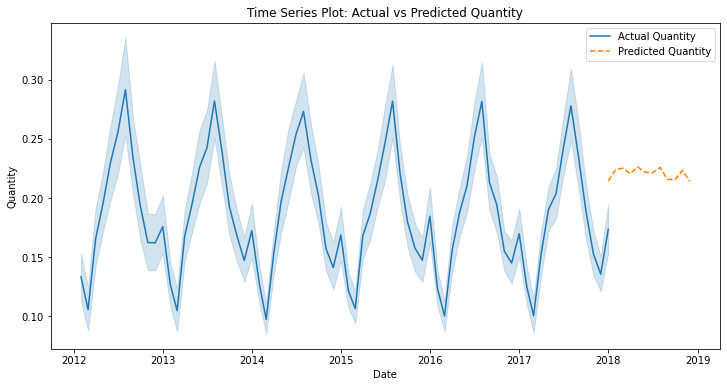

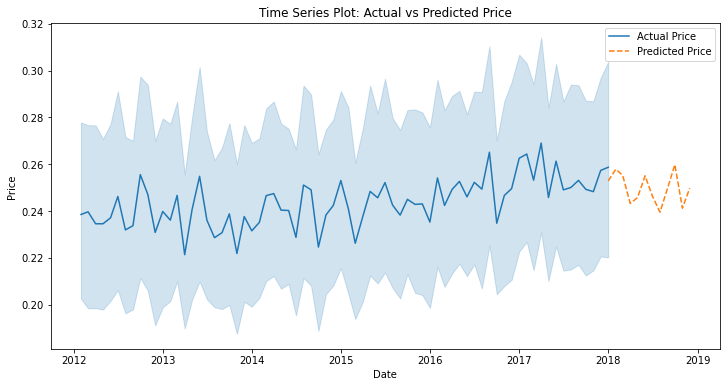

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Assuming the date format is 'dd-mm-yyyy'
new_data['date'] = pd.to_datetime(new_data['date'])

# Assuming 'date' is your time column and 'quantity' and 'price' are the target variables
data = new_data[['date', 'quantity', 'price']].copy()

# Sort the data by date
data = data.sort_values(by='date')


data['date'] = data['date'].dt.tz_localize(None)

# Replace this with your time series forecasting model
model_quantity = ExponentialSmoothing(data['quantity'], seasonal='add', seasonal_periods=12)
fitted_model_quantity = model_quantity.fit()

model_price = ExponentialSmoothing(data['price'], seasonal='add', seasonal_periods=12)
fitted_model_price = model_price.fit()

# Make predictions for future instances
future_dates = pd.date_range(start=new_data['date'].max(), periods=12, freq='M', tz=None)  # Set timezone to None
future_quantity = fitted_model_quantity.forecast(12)
future_price = fitted_model_price.forecast(12)

# Plot actual and predicted values for quantity
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['date'], y=data['quantity'], label='Actual Quantity')
sns.lineplot(x=future_dates, y=future_quantity, label='Predicted Quantity', linestyle='--')
plt.title('Time Series Plot: Actual vs Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Plot actual and predicted values for price
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['date'], y=data['price'], label='Actual Price')
sns.lineplot(x=future_dates, y=future_price, label='Predicted Price', linestyle='--')
plt.title('Time Series Plot: Actual vs Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### 5. Code Submission